# Load Data from MATLAB

### Import libraries

In [40]:
!pip install pandas
import snntorch.spikeplot as splt
import scipy.io
import torch
from snntorch import spikegen
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [41]:
# DATA_FOLDER = "C:\Users\janso\Downloads\P1"
DATA_PATH = r"C:\\Users\\janso\\Downloads\\P1\\WS_P1_S9.mat"

mat_data = scipy.io.loadmat(DATA_PATH)
var = mat_data['ws'][0][0] # ws list basically

### Parse data into usable form

In [42]:
identifier = None
participant_num = None
series = None
dataDict = None
for i, ele in enumerate(var):
    minivar = ele[0] # values in ws struct
    if i == 1:
        identifier = minivar
    elif i == 2:
        participant_num = minivar 
    elif i == 3:
        series = minivar
    else: # all of data
        dataDict = minivar

In [43]:
# print(data)
# print('---------------------')
# print(type(data))
# print(len(data))
eeg_list = dataDict['eeg']
one_series = eeg_list[0]
print(f" electrodes: {len(one_series[0])} values: {len(one_series)}")

 electrodes: 32 values: 4570


time sampled values stored vertically, need to re-organize so can grab the values for one electrode at a time (rotate 90!)

In [44]:
a = np.array(one_series)
print(a.shape)
transpose = np.transpose(a)
print(transpose.shape)

(4570, 32)
(32, 4570)


Text(0, 0.5, 'Voltage (mV)')

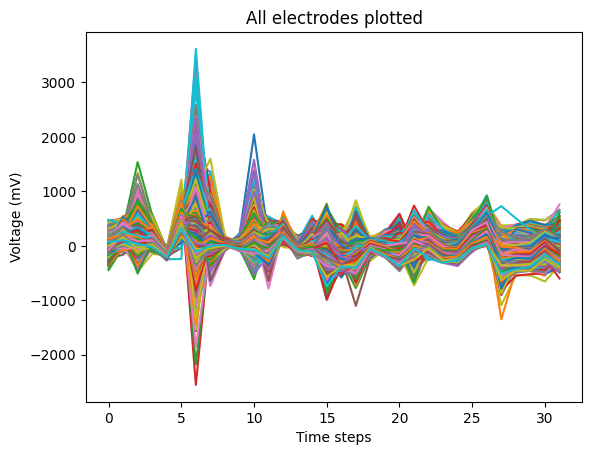

In [45]:
data = torch.Tensor(transpose) # graph all spikes
plt.plot(data)
plt.title("All electrodes plotted")
plt.xlabel("Time steps")
plt.ylabel("Voltage (mV)")

Text(0, 0.5, 'Voltage (mV)')

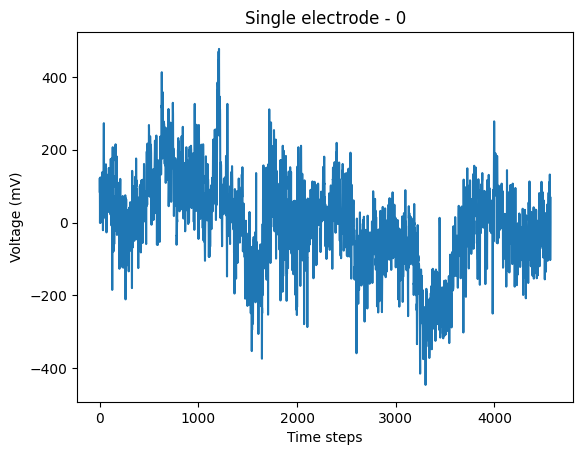

In [46]:
one_spike = torch.Tensor(transpose[0]) # graph all spikes
plt.plot(one_spike)
plt.title("Single electrode - 0")
plt.xlabel("Time steps")
plt.ylabel("Voltage (mV)")

### Deciding threshold

In [48]:
# related noise value and average
avg_threshold = np.median(transpose[0])
print(avg_threshold)

3.0


### Encode Data

In [49]:
spike_data = spikegen.delta(one_spike, threshold=avg_threshold)
print(spike_data)

tensor([1., 1., 0.,  ..., 1., 1., 1.])


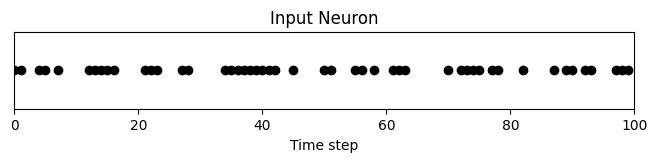

In [ ]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)
splt.raster(spike_data, ax, c="black")
plt.title("Input Neuron for first 100 time steps")
plt.xlabel("Time step")
plt.yticks([])
plt.xlim(0, 100) # go up to transpose.shape[1]
plt.show()

In [64]:
# print("min :", np.min(spike_data.array))
# print("max :", np.max(spike_data.array))
# help(spike_data)